# India-China Trade Relation Analysis(EDA)

In [47]:
#importing essential modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
data=pd.read_csv("C:\DataScience\Datasets\exports and imports of india(1997-2022) - exports and imports.csv")

# Handling and Organizing data

In [3]:
data.shape

(5767, 7)

In [4]:
data.columns

Index(['Country', 'Export', 'Import', 'Total Trade', 'Trade Balance',
       'Year(start)', 'Year(end)'],
      dtype='object')

In [5]:
data.dtypes

Country          object
Export           object
Import           object
Total Trade      object
Trade Balance    object
Year(start)       int64
Year(end)         int64
dtype: object

In [6]:
#Numerical data
x=data.dtypes
x[x!=object]

Year(start)    int64
Year(end)      int64
dtype: object

In [7]:
#Categorical data
x[x==object]

Country          object
Export           object
Import           object
Total Trade      object
Trade Balance    object
dtype: object

In [8]:
data.head()

,Country,Export,Import,Total Trade,Trade Balance,Year(start),Year(end)
0,AFGHANISTAN,21.25,10.7,31.95,10.55,97,98
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,98,99
2,AFGHANISTAN,33.2,21.06,54.26,12.15,99,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002


In [9]:
data.isnull().sum()

Country            0
Export             8
Import           532
Total Trade      566
Trade Balance    566
Year(start)        0
Year(end)          0
dtype: int64

In [10]:
data.notnull().sum()

Country          5767
Export           5759
Import           5235
Total Trade      5201
Trade Balance    5201
Year(start)      5767
Year(end)        5767
dtype: int64

In [11]:
data.Export.describe()

count     5759
unique    4291
top          0
freq        63
Name: Export, dtype: object

In [12]:
data.Import.describe()

count     5235
unique    3595
top          0
freq       142
Name: Import, dtype: object

In [13]:
data

,Country,Export,Import,Total Trade,Trade Balance,Year(start),Year(end)
0,AFGHANISTAN,21.25,10.7,31.95,10.55,97,98
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,98,99
2,AFGHANISTAN,33.2,21.06,54.26,12.15,99,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002
...,...,...,...,...,...,...,...
5762,ZIMBABWE,163.54,62.2,225.74,101.34,2017,2018
5763,ZIMBABWE,181.72,7.79,189.51,173.93,2018,2019
5764,ZIMBABWE,161.13,13.59,174.72,147.54,2019,2020
5765,ZIMBABWE,175.72,5.71,181.42,170.01,2020,2021


In [14]:
data['Export'] = data['Export'].replace({',': ''}, regex=True).astype(float)

In [15]:
data['Export']

0        21.25
1        12.81
2        33.20
3        25.86
4        24.37
         ...  
5762    163.54
5763    181.72
5764    161.13
5765    175.72
5766    148.89
Name: Export, Length: 5767, dtype: float64

In [16]:
data['Import'] = data['Import'].replace({',': ''}, regex=True).astype(float)

In [17]:
data['Import']

0       10.70
1       28.14
2       21.06
3       26.59
4       17.52
        ...  
5762    62.20
5763     7.79
5764    13.59
5765     5.71
5766     1.69
Name: Import, Length: 5767, dtype: float64

In [18]:
data['Total Trade'] = data['Total Trade'].replace({',': ''}, regex=True).astype(float)

In [19]:
data['Total Trade']

0        31.95
1        40.95
2        54.26
3        52.45
4        41.89
         ...  
5762    225.74
5763    189.51
5764    174.72
5765    181.42
5766    150.58
Name: Total Trade, Length: 5767, dtype: float64

In [20]:
data['Trade Balance'] = data['Trade Balance'].replace({',': ''}, regex=True).astype(float)

In [21]:
data['Trade Balance']

0        10.55
1       -15.33
2        12.15
3        -0.73
4         6.85
         ...  
5762    101.34
5763    173.93
5764    147.54
5765    170.01
5766    147.20
Name: Trade Balance, Length: 5767, dtype: float64

In [22]:
data['Year(start)']

0         97
1         98
2         99
3       2000
4       2001
        ... 
5762    2017
5763    2018
5764    2019
5765    2020
5766    2021
Name: Year(start), Length: 5767, dtype: int64

In [23]:
data['Year(end)']

0         98
1         99
2       2000
3       2001
4       2002
        ... 
5762    2018
5763    2019
5764    2020
5765    2021
5766    2022
Name: Year(end), Length: 5767, dtype: int64

In [24]:
data['Year(start)'] = data['Year(start)'].astype(str)

In [25]:
data['Year(start)']=data['Year(start)'].apply(lambda x: '19'+x if len(x) != 4 else x)
data['Year(start)']

0       1997
1       1998
2       1999
3       2000
4       2001
        ... 
5762    2017
5763    2018
5764    2019
5765    2020
5766    2021
Name: Year(start), Length: 5767, dtype: object

In [26]:
data['Year(start)'] = data['Year(start)'].astype(int)
data['Year(start)'] 

0       1997
1       1998
2       1999
3       2000
4       2001
        ... 
5762    2017
5763    2018
5764    2019
5765    2020
5766    2021
Name: Year(start), Length: 5767, dtype: int32

In [27]:
data['Year(end)'] = data['Year(end)'].astype(str)

In [28]:
data['Year(end)']=data['Year(end)'].apply(lambda x: '19'+x if len(x) != 4 else x)
data['Year(end)']

0       1998
1       1999
2       2000
3       2001
4       2002
        ... 
5762    2018
5763    2019
5764    2020
5765    2021
5766    2022
Name: Year(end), Length: 5767, dtype: object

In [29]:
data['Year(end)'] = data['Year(end)'].astype(int)
data['Year(end)']

0       1998
1       1999
2       2000
3       2001
4       2002
        ... 
5762    2018
5763    2019
5764    2020
5765    2021
5766    2022
Name: Year(end), Length: 5767, dtype: int32

# Handling Missing Values

In [30]:
data.isnull().sum()

Country            0
Export             8
Import           532
Total Trade      566
Trade Balance    566
Year(start)        0
Year(end)          0
dtype: int64

We can take average of the exprot,import,total trade, tradebalance to fill the missing values but first count values if it comes under the 35% of missing values to treat the column.
If missing values is above 35% then, we can drop that column as the higher than 35% missing values will corrupt the data. 

In [31]:
print("Export missing value in % :" ,(8/5767)*100)
print("Import missing value in % :",(532/5767)*100)
print("Total Trade missing value  in % :",(566/5767)*100)
print("Trade Balance missing value in % :",(566/5767)*100)

Export missing value in % : 0.1387203051846714
Import missing value in % : 9.224900294780648
Total Trade missing value  in % : 9.814461591815501
Trade Balance missing value in % : 9.814461591815501


All the above missing values are far less than 35%  of total values counts. Hece, we can treat missing values. 

# Treating export missing values


In [32]:
data['Export']=data['Export'].fillna(data['Export'].mean())

In [33]:
data.isnull().sum()

Country            0
Export             0
Import           532
Total Trade      566
Trade Balance    566
Year(start)        0
Year(end)          0
dtype: int64

In [34]:
data['Import']=data['Import'].fillna(data['Import'].mean())

In [35]:
data.isnull().sum()

Country            0
Export             0
Import             0
Total Trade      566
Trade Balance    566
Year(start)        0
Year(end)          0
dtype: int64

In [36]:
data['Total Trade']=data['Total Trade'].fillna(data['Total Trade'].mean())

In [37]:
data.isnull().sum()

Country            0
Export             0
Import             0
Total Trade        0
Trade Balance    566
Year(start)        0
Year(end)          0
dtype: int64

In [38]:
data['Trade Balance']=data['Trade Balance'].fillna(data['Trade Balance'].mean())

In [39]:
data.isnull().sum()

Country          0
Export           0
Import           0
Total Trade      0
Trade Balance    0
Year(start)      0
Year(end)        0
dtype: int64

# India-China Export and Import 

In [40]:
data.describe()

,Export,Import,Total Trade,Trade Balance,Year(start),Year(end)
count,5767.000000,5767.000000,5767.000000,5767.000000,5767.000000,5767.000000
mean,818.347338,1326.562976,2240.639304,-429.802859,2009.108202,2010.108202
std,3041.604269,4439.656617,6840.839181,3311.145597,7.180789,7.180789
min,0.000000,0.000000,0.000000,-63047.160000,1997.000000,1998.000000
25%,3.155000,1.700000,17.995000,-226.510000,2003.000000,2004.000000
50%,46.690000,46.540000,194.860000,1.230000,2009.000000,2010.000000
75%,365.130000,972.735000,2211.875000,51.505000,2015.000000,2016.000000
max,55786.380000,76380.700000,89714.230000,24442.380000,2021.000000,2022.000000


In [41]:
y1=data[data.Country.str.contains("CHINA")].Export

In [42]:
y2=data[data.Country.str.contains("CHINA")].Import

In [43]:
x1=str(data['Year(start)'])
x2=str(data['Year(end)'])

In [44]:
data['Year_Range'] = data['Year(start)'].map(str) + '-' + data['Year(end)'].map(str)

In [45]:
x=data['Year_Range']
x

0       1997-1998
1       1998-1999
2       1999-2000
3       2000-2001
4       2001-2002
          ...    
5762    2017-2018
5763    2018-2019
5764    2019-2020
5765    2020-2021
5766    2021-2022
Name: Year_Range, Length: 5767, dtype: object

C:\Users\sh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


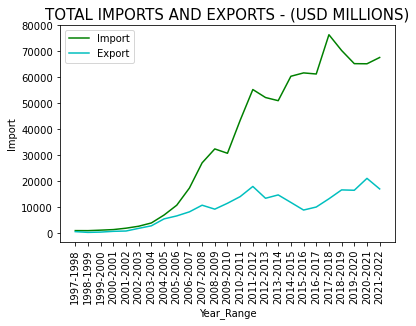

In [50]:
sns.lineplot(x, y2, data=new_data, color = 'g', markers=["o", "o"]);
sns.lineplot(x, y1, data=new_data, color  = 'c');
plt.title('TOTAL IMPORTS AND EXPORTS - (USD MILLIONS)', size = 15);
plt.xticks(rotation=90);
plt.legend(['Import', 'Export'])

In [51]:
data[(data.Country.str.contains("CHINA"))].Import.max()

76380.7

In [49]:
p=data[(data.Country.str.contains("CHINA"))]
new_data=pd.DataFrame(p)
new_data

,Country,Export,Import,Total Trade,Trade Balance,Year(start),Year(end),Year_Range
1061,CHINA P RP,717.95,1112.05,1830.00,-394.11,1997,1998,1997-1998
1062,CHINA P RP,427.16,1096.71,1523.87,-669.55,1998,1999,1998-1999
1063,CHINA P RP,539.04,1282.89,1821.93,-743.86,1999,2000,1999-2000
1064,CHINA P RP,831.30,1502.20,2333.50,-670.89,2000,2001,2000-2001
1065,CHINA P RP,951.95,2036.39,2988.34,-1084.44,2001,2002,2001-2002
1066,CHINA P RP,1975.48,2792.04,4767.52,-816.56,2002,2003,2002-2003
1067,CHINA P RP,2955.08,4053.21,7008.29,-1098.13,2003,2004,2003-2004
1068,CHINA P RP,5615.88,7097.98,12713.86,-1482.11,2004,2005,2004-2005
1069,CHINA P RP,6759.10,10868.05,17627.15,-4108.95,2005,2006,2005-2006
1070,CHINA P RP,8321.86,17475.03,25796.89,-9153.18,2006,2007,2006-2007


In [52]:
new_data.columns

Index(['Country', 'Export', 'Import', 'Total Trade', 'Trade Balance',
       'Year(start)', 'Year(end)', 'Year_Range'],
      dtype='object')

In [82]:
new_data.describe()

,Export,Import,Total Trade,Trade Balance,Year(start),Year(end)
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,9506.714000,34802.676000,44309.390000,-25295.962000,2009.000000,2010.000000
std,6380.169179,27638.236628,33444.441297,22150.093128,7.359801,7.359801
min,427.160000,1096.710000,1523.870000,-63047.160000,1997.000000,1998.000000
25%,2955.080000,4053.210000,7008.290000,-48478.910000,2003.000000,2004.000000
50%,10171.890000,32497.020000,42441.900000,-23143.520000,2009.000000,2010.000000
75%,14168.860000,61283.030000,72347.420000,-1098.130000,2015.000000,2016.000000
max,21187.150000,76380.700000,89714.230000,-394.110000,2021.000000,2022.000000


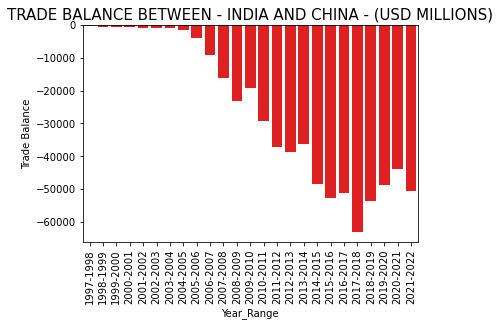

In [64]:
sns.barplot(x='Year_Range', y ='Trade Balance', data=new_data,color='red')
plt.title('TRADE BALANCE BETWEEN - INDIA AND CHINA - (USD MILLIONS)', size = 15);

plt.xticks(rotation=90)
plt.show()

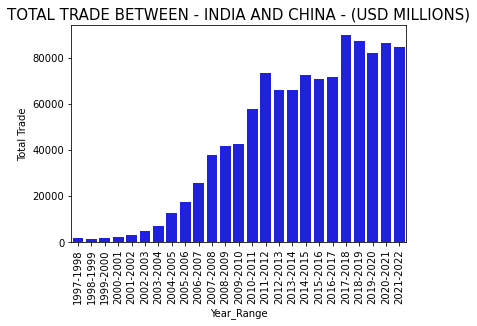

In [77]:
sns.barplot(x='Year_Range', y ='Total Trade', data=new_data,color='blue')
plt.title('TOTAL TRADE BETWEEN - INDIA AND CHINA - (USD MILLIONS)', size = 15);

plt.xticks(rotation=90)
plt.show()

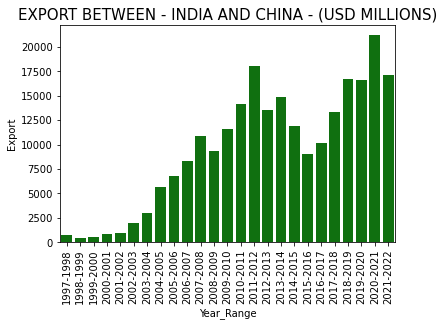

In [78]:
sns.barplot(x='Year_Range', y ='Export', data=new_data,color='green')
plt.title('EXPORT BETWEEN - INDIA AND CHINA - (USD MILLIONS)', size = 15);

plt.xticks(rotation=90)
plt.show()

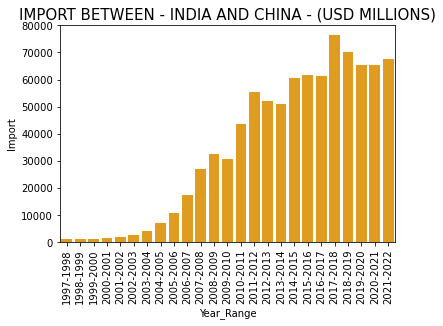

In [81]:
sns.barplot(x='Year_Range', y ='Import', data=new_data,color='orange')
plt.title('IMPORT BETWEEN - INDIA AND CHINA - (USD MILLIONS)', size = 15);

plt.xticks(rotation=90)
plt.show()

From the above analysis, it has been found that, the India-China Trade relationship is gradually increased upto year 2017-2018. It starts declining after year 2017-2018. Along with this, the difference between exports and Import is very high. India import more than it exports in China. Recent's year 2021-2022, the export and import has been increased after certain degree. 